## Load the `python` packages

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn import datasets
from sklearn.datasets import load_iris

%matplotlib inline

# handy helper for displaying stuff
from IPython.display import Image

### Load the dataset

In [2]:
iris = load_iris()

### Convert the dataset into a pandas dataframe:

In [3]:
# convert the dataset into a pandas dataframe (just a matter of taste!)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#### Change the names of the columns (features):

In [4]:
iris_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df.columns = iris_features

#### Add a column of the target classes to the dataframe:

In [5]:
iris_df["target"] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Add a column for the target classes that contains the names of the species:

In [6]:
iris_df['species'] = [iris.target_names[x] for x in iris.target]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Plot pair-wise the features of the dataframe

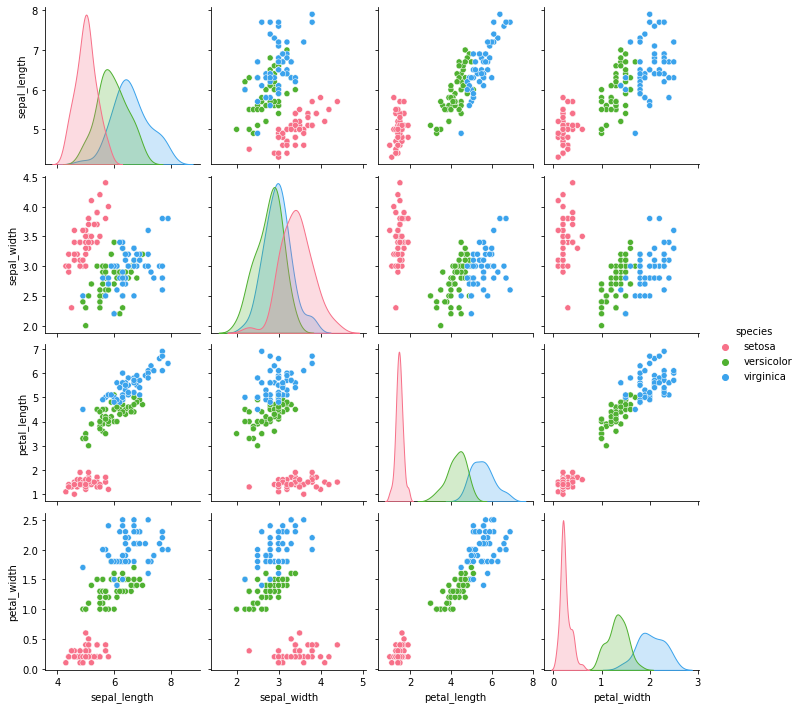

In [7]:
sns.pairplot(iris_df, vars = iris_df.columns[0:4], hue='species', palette='husl')

## Decision Trees Models

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### A simple model: only sepal_length over petal_width

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
which_features = ['sepal_length', 'sepal_width']
X = iris_df[which_features].values # take two features from the dataframe 

In [10]:
Y = iris_df.target.values

In [11]:
max_tree_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_tree_depth)

In [12]:
#tree_clf = clf.fit(iris.data, iris.target)
tree_clf = tree_clf.fit(X, Y)

## Visualize the trained Decision Tree

### First way: using `sklearn.tree.plot_tree`

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html


In [13]:
from sklearn.tree import plot_tree

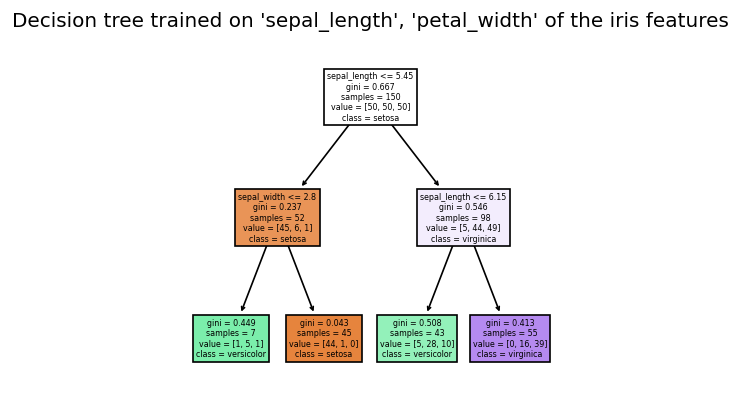

In [14]:
fig_plottree, axes_plottree = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=120)
plot_tree(tree_clf, 
          #feature_names=iris.feature_names[2:], 
          feature_names=which_features, 
          class_names=iris.target_names, 
          filled=True)
axes_plottree.set_title("Decision tree trained on 'sepal_length', 'petal_width' of the iris features")
fig_plottree.savefig('iris_tree.png')

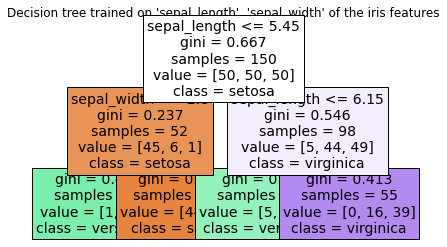

In [15]:
# another, simpler way:
plt.figure()
plot_tree(tree_clf, 
          #feature_names=iris.feature_names[2:], 
          feature_names=which_features, 
          class_names=iris.target_names, 
          filled=True, 
          fontsize=14
         )
plt.title("Decision tree trained on 'sepal_length', 'sepal_width' of the iris features")
plt.show()

### A text-based diagram:


In [16]:
from sklearn.tree import export_text

In [17]:
#export the decision rules
tree_rules = export_text(tree_clf,
                         feature_names = which_features)

#print the result
print(tree_rules)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2



### Second way: using `sklearn.tree.export_graphviz`

* Output a graph definition file called iris_tree.dot

* Convert this .dot file to a variety of formats, such as PDF or PNG

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

1. To be able to install Graphviz on your Mac through this method, you first need to have Anaconda installed
2. Open a terminal
3. Type the command below to install Graphviz:

    `conda install python-graphviz`

4. After that, you should be able to use the dot command below to convert the dot file into a png file:

    `dot -Tpng tree.dot -o tree.png`
    
**CAUTION: It is troubleshooting!!!**

```python
from sklearn.tree import export_graphviz

with open("iris.dot", 'w') as f:
    dot_data = export_graphviz(tree_clf, 
                               out_file=f,
                               feature_names=iris.feature_names[2:],
                               class_names=iris.target_names,
                               filled=True, 
                               rounded=True)
!dot -Tpng iris.dot -o iris.png
rm iris.dot
# usually displays the error: /bin/bash: dot: command not found
```

### Plot the decision surface of decision trees

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py


In [18]:
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [19]:
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])

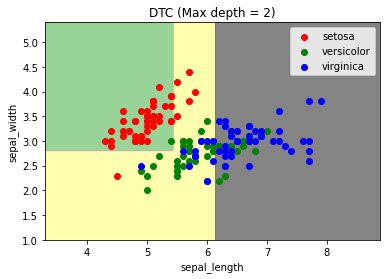

In [20]:
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[Y==i, 0], X[Y==i, 1], color=color, label=target)

plt.xlabel(f'{which_features[0]}')
plt.ylabel(f'{which_features[1]}')
plt.title(f'DTC (Max depth = {max_tree_depth})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

### Estimating Class Probabilities:

In [21]:
# make a single prediction 
print(tree_clf.predict_proba([[4, 4.5]]))
print(tree_clf.predict([[4, 4.5]]))

[[0.97777778 0.02222222 0.        ]]
[0]


In [22]:
# make a single prediction 
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.14285714 0.71428571 0.14285714]]
[1]


In [23]:
# make a single prediction 
print(tree_clf.predict_proba([[8, 3.5]]))
print(tree_clf.predict([[8, 3.5]]))

[[0.         0.29090909 0.70909091]]
[2]


In [24]:
# make a single prediction 
print(tree_clf.predict_proba([[6.0, 3.0]]))
print(tree_clf.predict([[6.0, 3.0]]))

[[0.11627907 0.65116279 0.23255814]]
[1]


## Evaluating the Decision Trees

Use **all** iris features!

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = iris_df[iris_features]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = iris_df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [28]:
# The data is split into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 5)
# print out the shape of the training and testing sets:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [29]:
max_tree_depth = 3
tree_clf = DecisionTreeClassifier(max_depth=max_tree_depth)

# Fit the model:
tree_clf.fit(X_train, y_train)

# Predict the response:
y_pred = tree_clf.predict(X_test)

### Methods that come together with the DecisionTreeClassifier:

In [30]:
tree_clf.score(X_test, y_test)

0.9473684210526315

In [31]:
tree_clf.score(X_train, y_train)

0.9821428571428571

In [32]:
tree_clf.predict_proba(X, check_input=True)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

## Evaluate the DT Classifier: The confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
mat_test = confusion_matrix(y_test, y_pred)
print('confusion matrix = \n', mat_test)

confusion matrix = 
 [[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


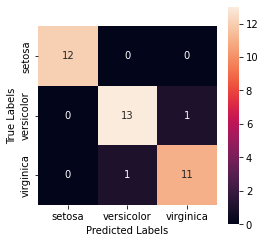

In [35]:
fig_cm, ax_cm = plt.subplots(1, 1, figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
ax_cm = sns.heatmap(cm, annot=True, square=True,
                    xticklabels=iris.target_names,
                    yticklabels=iris.target_names)
ax_cm.set_xlabel('Predicted Labels')
ax_cm.set_ylabel('True Labels');

### Accuracy performance:

* accuracy_score:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

* precision_score:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

* recall_score:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

* f1:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

* classification_report:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

* **Accuracy:**

    `sum(diagonals in the confusion matrix) / sum (all boxes in the confusion matrix`
    
    $\dfrac{\sum{\mbox{diagonals in the confusion matrix}}}{\sum{\text{all boxes in the confusion matrix}}}$


* **Precision:**

    `True positive (number in diagonal)/All positives (column sum)`
    
    $\dfrac{\text{True positive (number in diagonal)}}{\text{All positives (column sum)}} = \dfrac{TP}{TP + FP}$
    
    
* **Recall:**

    `True positive (number in diagonal)/All assignments (row sum)`
    
    $\dfrac{\text{True positive (number in diagonal)}}{\text{All assignments (row sum)}} = \dfrac{TP}{TP + FN}$
    
* **f1:**

    `2 * (precision * recall)/(precision + recall)`
    
    $2\times \dfrac{(\text{precision} \times \text{recall})}{\text{(precision + recall)}}$

In [37]:
# Evaluate accuracy:
labels = iris_df.species.unique()
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.9473684210526315
[1.         0.92857143 0.91666667]
[1.         0.92857143 0.91666667]


In [38]:
f1 = f1_score(y_test, y_pred, average=None)
f1_results = pd.DataFrame(f1, index=labels)
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
setosa,1.000000
versicolor,0.928571
virginica,0.916667


In [39]:
# All metrics in a single output:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Feature importance

In [40]:
#extract importance
importance = pd.DataFrame({'feature': X_train.columns, 
                           'importance' : np.round(tree_clf.feature_importances_, 3)
                          }
                         )
importance.sort_values('importance', ascending=False, inplace = True)
importance

,feature,importance
2,petal_length,0.556
3,petal_width,0.444
0,sepal_length,0.000
1,sepal_width,0.000


According to the `importance` results above, which feature is the most important?

Is this the only important feature?

/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


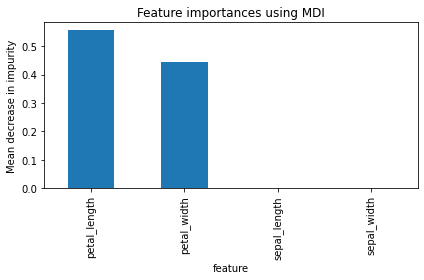

In [41]:
ser = pd.Series(importance.importance)
ser.index = importance.feature

fig, ax = plt.subplots()
ser.plot.bar(yerr=importance, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### How many features are being selected

In [42]:
from sklearn.feature_selection import SelectFromModel

In [43]:
abc = SelectFromModel(tree_clf, prefit=True)
x_upd = abc.transform(X)

In [44]:
np.array(X).shape[1]

4

In [45]:
np.array(x_upd).shape[1]

2

### Prune the tree to maximum depth of 4:

In [46]:
clf_pruned = DecisionTreeClassifier(criterion='entropy', 
                                   random_state=50, 
                                   max_depth=3, 
                                   min_samples_leaf=6, 
                                   )

In [47]:
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,
                       random_state=50)

In [48]:
prediction_pruned = clf_pruned.predict(X_test)
prediction_pruned_train = clf_pruned.predict(X_train)

In [49]:
print(accuracy_score(y_test, prediction_pruned))
print(accuracy_score(y_train, prediction_pruned_train))

0.9210526315789473
0.9732142857142857


In [50]:
acc_DT = accuracy_score(y_test, prediction_pruned)

In [51]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'],
                          'accuracy':acc_DT})

## Regularization Hyperparameters

```python
clf = DecisionTreeClassifier(criterion="entropy", # default: "gini"
                             splitter="best", # "random"
                             max_depth=5, 
                             min_samples_split=4, # default=2
                             random_state=0, 
                             max_leaf_nodes=5, 
                            )
```

# Ensemble Algorithms

## Random Forest Classifier

```python
sklearn.ensemble.RandomForestClassifier
```

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Advanced Modeling: Feature transformations with ensembles of trees

https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

From V.V. p. 186:

A `random forest` is an ensemble-based technique where it creates multiple smaller trees using a subset of data.

The final decision is based on the `voting` mechanism by each of the trees.

Decision trees are prone to overfitting. An ensemble-based random forest is a good choice to tackle overfitting.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

In [53]:
rf_model = RandomForestClassifier(n_estimators=50, # The number of trees in the forest
                                  max_depth=5, 
                                  random_state=10, 
                                  criterion='gini', # 'entropy'
                                  bootstrap = True, 
                                  max_features = 'sqrt')

In [54]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=50,
                       random_state=10)

In [55]:
prediction_RF = rf_model.predict(X_test)

In [56]:
print(confusion_matrix(y_test, prediction_RF))

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


Text(0.5, 1.0, 'Confusion Matrix')

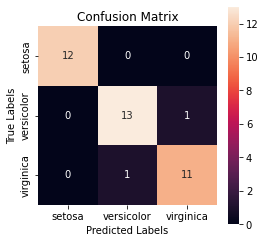

In [57]:
fig_cm_RF, ax_cm_RF = plt.subplots(1, 1, figsize=(4, 4))
cm_RF = confusion_matrix(y_test, prediction_RF)
ax_cm_RF = sns.heatmap(cm_RF, annot=True, square=True,
                       xticklabels=iris.target_names,
                       yticklabels=iris.target_names)
ax_cm_RF.set_xlabel('Predicted Labels')
ax_cm_RF.set_ylabel('True Labels')
ax_cm_RF.set_title('Confusion Matrix')

In [58]:
acc_RF = accuracy_score(y_test, prediction_RF)

In [59]:
resultsRF = pd.DataFrame({'Method':['Random Forest'],
                          'accuracy':acc_RF})
resultsDf = pd.concat([resultsDf, resultsRF])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.921053
0,Random Forest,0.947368


# Ensemble Algorithms
## AdaBoost Algorithm

`Refer to Vaibhav Verdhan, chapter 4, pages 193-208`

Boosting is an ensemble method that creates a strong classifier from weak classifiers.

A new model is created in a sequence, learning from the misclassifications of the previous model.

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
adaboost_clf = AdaBoostClassifier(n_estimators=50, 
                                 learning_rate=0.05, 
                                 random_state=5
                                 )

In [62]:
# fit the training data:
adaboost_clf = adaboost_clf.fit(X_train, y_train)

In [63]:
# make predictions on the testing data:
prediction_adaboost = adaboost_clf.predict(X_test)

In [64]:
# compute the accuracy:
acc_AB = accuracy_score(y_test, prediction_adaboost)
resultsAB = pd.DataFrame({'Method':['AdaBoost'],
                          'accuracy':acc_AB})
resultsDf = pd.concat([resultsDf, resultsAB])
resultsDf

,Method,accuracy
0,Decision Tree,0.921053
0,Random Forest,0.947368
0,AdaBoost,0.921053


# Ensemble Algorithms
## Bagging Classifier

`Refer to Vaibhav Verdhan, chapter 4, pages 193-208`

In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
bagging_clf = BaggingClassifier(n_estimators=55, 
                               max_samples=0.5, 
                               bootstrap=True, 
                               oob_score=True, 
                               random_state=5, 
                               )

In [67]:
# fit the training data:
bagging_clf = bagging_clf.fit(X_train, y_train)

In [68]:
# make predictions on the testing data:
prediction_bagging = bagging_clf.predict(X_test)

In [69]:
# compute the accuracy:
acc_BG = accuracy_score(y_test, prediction_bagging)
resultsBG = pd.DataFrame({'Method':['Bagging'],
                          'accuracy':acc_BG})
resultsDf = pd.concat([resultsDf, resultsBG])
resultsDf

,Method,accuracy
0,Decision Tree,0.921053
0,Random Forest,0.947368
0,AdaBoost,0.921053
0,Bagging,0.921053


# Ensemble Algorithms
## Gradient Boosting Classifier

`Refer to Vaibhav Verdhan, chapter 4, pages 193-208`

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gradientBoosting_clf = GradientBoostingClassifier(n_estimators=55, 
                                                  learning_rate=0.05, 
                                                  random_state=5, 
                                                 )

In [72]:
# fit the training data:
gradientBoosting_clf = gradientBoosting_clf.fit(X_train, y_train)

In [73]:
# make predictions on the testing data:
prediction_GB = gradientBoosting_clf.predict(X_test)

In [74]:
# compute the accuracy:
acc_GB = accuracy_score(y_test, prediction_GB)
resultsGB = pd.DataFrame({'Method':['Gradient Boosting'],
                          'accuracy':acc_GB})
resultsDf = pd.concat([resultsDf, resultsGB])
resultsDf

,Method,accuracy
0,Decision Tree,0.921053
0,Random Forest,0.947368
0,AdaBoost,0.921053
0,Bagging,0.921053
0,Gradient Boosting,0.947368


**What do you conclude? Which one is the best ensemble method?**

It is recommended to test random forest and gradient boosting for real-world problems.

<AxesSubplot:>

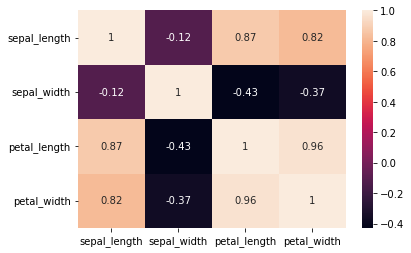

In [75]:
sns.heatmap(iris_df[iris_features].corr(), annot=True)

## Theory

1. Gini impurity:
$$G_i = 1 - \sum^{n}_{k=1} p_{i,k}^2$$

* $p_{i,k}$ is the ratio of class `k` instances among the training instances in the `ith` node
* Gini impurity is slightly faster to compute

2. Entropy:
$$H_i = - \sum^{n}_{k=1, p_{i,k}\ne0} p_{i,k} \log_2{(p_{i,k})}$$

* measures homogeneity of data in a node
* entropy is defined as zero when the data points in the node all belongs to one single class
* it is equal to 1 when 
* node containing data dominated by one class, i.e. entropy is small, is ready to become a decision node
* Most of the time they lead to similar trees.  However, when they differ, `Gini impurity` tends to isolate the most frequent class in its own branch of the tree, while `entropy` tends to produce slightly more balanced trees.

3. Information gain (IG):
$$IG = e_s - \sum_{i=1,2} w_{i} H_i$$